![](_fig/labeled.jpg)

# PyStudio 3: Using Machine Learning

## Finding Value: Predicting Performance on Value Based Payments from CMS Hospital Compare Data

### Setup Workspace

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [4]:
os.chdir("/home/drewc/allocativ/py4hc")

In [5]:
df_cms = pd.read_csv("_data/cms.csv")

In [6]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 178 entries, Facility ID to Track Electronic Labs
dtypes: float64(152), int64(25), object(1)
memory usage: 3.1+ MB


,Facility ID,FIPS,2018 VBP Adjustment Factor,2019 VBP Adjustment Factor,2020 VBP Adjustment Factor,READM-30-AMI-HRRP,READM-30-CABG-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,...,Efficient use of medical imaging national comparison Above Average,Mortality national comparison Below Average,Safety of care national comparison Below Average,Readmission national comparison Below Average,Patient experience national comparison Below Average,Effectiveness of care national comparison Below Average,Timeliness of care national comparison Below Average,Efficient use of medical imaging national comparison Below Average,Receive Electronic Labs,Track Electronic Labs
0,100001,FIPS12031,0.997517,1.002304,0.997413,1.0685,0.9213,1.0591,1.0757,1.1851,...,0,0,0,1,0,1,1,1,1,1
1,100002,FIPS12099,0.995494,0.996971,0.991655,0.9468,0.8829,1.0612,1.0224,0.7993,...,0,0,0,1,1,0,0,0,1,1
2,100006,FIPS12095,0.995280,0.996284,0.994979,0.9460,1.0253,1.0125,1.0152,1.2449,...,1,0,0,1,0,0,0,0,1,1
3,100007,FIPS12095,1.005295,1.007495,1.007056,1.0062,1.3440,0.9761,1.0807,1.1310,...,1,0,1,1,0,0,1,0,1,1
4,100008,FIPS12086,0.995473,0.993890,0.996734,0.9415,0.9824,1.0537,0.9574,0.8431,...,1,0,1,1,0,0,1,0,1,1


### Process Data

In [7]:
df_cms = df_cms.dropna(subset = ["2020 VBP Adjustment Factor",
                                "2019 VBP Adjustment Factor"])

In [8]:
df_cms["train"] = np.where(df_cms["2020 VBP Adjustment Factor"] > 1, 1, 0) # Create categorical test target outcome based on conditions
df_cms["test"] = np.where(df_cms["2019 VBP Adjustment Factor"] > 1, 1, 0) 
df_cms["quant"] = df_cms["2020 VBP Adjustment Factor"]

In [9]:
df_cms = df_cms.drop(columns = ["Facility ID",
                                "FIPS",
                                "2020 VBP Adjustment Factor", 
                                "2019 VBP Adjustment Factor", 
                                "2018 VBP Adjustment Factor",
                                "Weighted Normalized Clinical Outcomes Domain Score",
                                "Weighted Person and Community Engagement Domain Score",
                                "Weighted Safety Domain Score",
                                "Weighted Efficiency and Cost Reduction Domain Score",
                                "Total Performance Score"])

In [10]:
df_cms = df_cms.dropna(axis = 1, thresh = 0.75*len(df_cms)) # Drop features less than 75% non-NA count for all columns
df_cms = pd.DataFrame(SimpleImputer(strategy = "median").fit_transform(df_cms), columns = df_cms.columns) # Impute missing data

In [11]:
df_cms = pd.DataFrame(StandardScaler().fit_transform(df_cms.values), columns = df_cms.columns)

In [12]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Columns: 150 entries, READM-30-COPD-HRRP to quant
dtypes: float64(150)
memory usage: 2.5 MB


,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-PN-HRRP,TOTAL HAC SCORE,Heart failure (HF) 30-Day Readmission Rate,Hospital return days for heart failure patients,Hospital return days for pneumonia patients,Pneumonia (PN) 30-Day Readmission Rate,Rate of readmission hospital wide,...,Readmission national comparison Below Average,Patient experience national comparison Below Average,Effectiveness of care national comparison Below Average,Timeliness of care national comparison Below Average,Efficient use of medical imaging national comparison Below Average,Receive Electronic Labs,Track Electronic Labs,train,test,quant
0,0.936296,0.948407,1.395617,0.187616,1.786217,0.338001,0.462404,0.913492,0.044357,0.416389,...,1.206772,-0.734247,3.413938,1.419129,2.736106,0.174574,0.208313,-1.151904,0.875517,-0.663961
1,0.970893,0.269272,-1.648187,0.039449,0.942383,-0.210529,0.114619,0.095265,0.205952,0.203522,...,1.206772,1.361940,-0.292917,-0.704657,-0.365483,0.174574,0.208313,-1.151904,-1.142182,-1.545344
2,0.168576,0.177531,1.867415,-1.516982,-0.453785,0.581792,0.992566,-0.144110,-1.894787,-0.222212,...,1.206772,-0.734247,-0.292917,-0.704657,-0.365483,0.174574,0.208313,-1.151904,-1.142182,-1.036578
3,-0.431102,1.012116,0.968790,1.980571,-0.778140,0.459897,0.822914,1.061469,1.660310,0.522823,...,1.206772,-0.734247,-0.292917,1.419129,-0.365483,0.174574,0.208313,0.868128,0.875517,0.812178
4,0.847333,-0.558942,-1.302623,0.271895,2.059098,-0.880955,1.026496,1.000538,0.448345,-0.328646,...,1.206772,-0.734247,-0.292917,1.419129,-0.365483,0.174574,0.208313,-1.151904,-1.142182,-0.767864


### Create Model

In [13]:
X = df_cms.drop(columns = ["quant", "train", "test"])
Y_quant = df_cms["quant"]

In [14]:
forest = RandomForestRegressor(n_estimators = 1000, max_depth = 10) 
forest.fit(X, Y_quant)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [15]:
rf = forest.feature_importances_

In [16]:
l_rf = list(zip(X, rf))
df_rf = pd.DataFrame(l_rf, columns = ["Features", "Gini"])
df_rf = df_rf.sort_values(by = ["Gini"], ascending = False) 

In [17]:
df_rf.head(10)

,Features,Gini
34,Medicare hospital spending per patient (Medica...,0.443277
127,Hospital overall rating,0.064438
4,TOTAL HAC SCORE,0.042933
134,Patient experience national comparison Above A...,0.027149
116,Death rate for heart failure patients,0.026241
117,Death rate for pneumonia patients,0.012877
51,Patients who gave their hospital a rating of 9...,0.010634
115,Death rate for heart attack patients,0.010173
49,Patients who gave their hospital a rating of 6...,0.010168
91,Patients who reported that their room and bath...,0.009601


### Display Results

Text(0, 0.5, '2020 VBP Adjustment Factor')

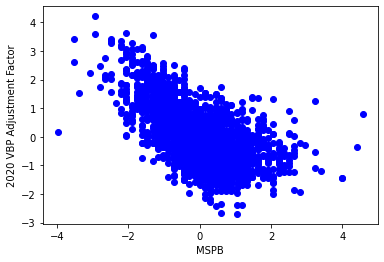

In [38]:
plt.scatter(X["Medicare hospital spending per patient (Medicare Spending per Beneficiary)"], Y_quant, c = "b")
plt.xlabel("MSPB")
plt.ylabel("2020 VBP Adjustment Factor")

Text(0, 0.5, '2020 VBP Adjustment Factor')

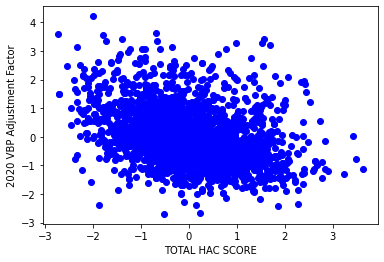

In [50]:
plt.scatter(X["TOTAL HAC SCORE"], Y_quant, c = "b")
plt.xlabel("TOTAL HAC SCORE")
plt.ylabel("2020 VBP Adjustment Factor")

Text(0, 0.5, '2020 VBP Adjustment Factor')

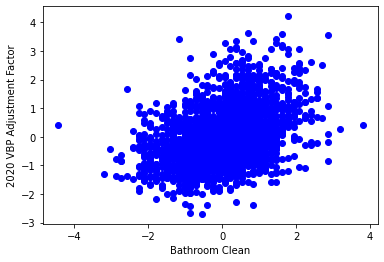

In [48]:
plt.scatter(X['Patients who reported that their room and bathroom were "Always" clean'], Y_quant, c = "b")
plt.xlabel("Bathroom Clean")
plt.ylabel("2020 VBP Adjustment Factor")

Text(0, 0.5, '2020 VBP Adjustment Factor')

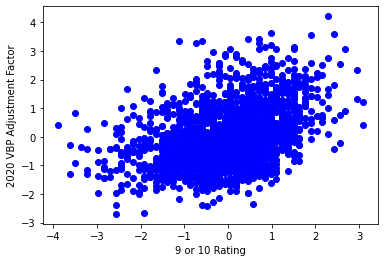

In [49]:
plt.scatter(X["Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)"], Y_quant, c = "b")
plt.xlabel("9 or 10 Rating")
plt.ylabel("2020 VBP Adjustment Factor")

## Assessment

### Reading & Video Quiz
After completing the articles and videos in the module, answer the following questions. Be sure to examine the questions and module materials carefully, the questions are taken directly from article and video content. 
1. 
2.
3.

### Studio Team Reflections
After reading the selected articles, watching the module videos, taking the quiz, and completing the studio session please answer ONE of the following questions.
After your individual post, respond to each other team member sharing points of similarity or difference in your experience. Length or style is not important.
1. What was something new that you learned in this module?
2. What was something that you knew previously but heard differently in this module?
3. What do you understand better after this module?
4. What is more confusing after this module?